In [18]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn wordcloud streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


# **Load the Dataset**

In [1]:
import pandas as pd

In [26]:
import csv

input_path = '/content/Resume.csv'
output_path = '/content/Cleaned_Resume.csv'

with open(input_path, 'r', encoding='utf-8', errors='ignore') as infile:
    lines = infile.readlines()

with open(output_path, 'w', encoding='utf-8') as outfile:
    for line in lines:
        if line.count('"') % 2 == 0 and len(line.strip()) > 10:
            outfile.write(line)



In [27]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
416,28933005,Kimberly Fisheli Summary Ded...,"<div class=""RNA skn-mlk5 fontsize fontface vma...",TEACHER
417,53129155,TW SUBSTITUTE TEACHER ...,"<div class=""skn-mlt6 fontsize fontface vmargin...",TEACHER
418,11943065,CLASSROOM TEACHER Professiona...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
419,45987048,Marilyn Hunter Summary Focus...,"<div class=""RNA skn-mdl1 fontsize fontface vma...",TEACHER


In [28]:
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64


# **Clean the Resume Text**

In [37]:
print(df.columns.tolist())


['ID', 'Resume_str', 'Resume_html', 'Category']


**Import Libraries and Download Stopwords**

In [29]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Clean Function**

In [38]:
def clean_resume(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))  # Remove non-letters
    text = text.lower().split()                 # Tokenize and lowercase
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    return ' '.join(text)

# Apply to correct column name
df['Cleaned_Resume'] = df['Resume_str'].apply(clean_resume)

# Preview cleaned resumes
df[['Category', 'Cleaned_Resume']].head()


,Category,Cleaned_Resume
0,HR,hr administrator marketing associate hr admini...
1,HR,hr specialist us hr operations summary versati...
2,HR,hr director summary years experience recruitin...
3,HR,hr specialist summary dedicated driven dynamic...
4,HR,hr manager skill highlights hr skills hr depar...


# **Visualize the Data**

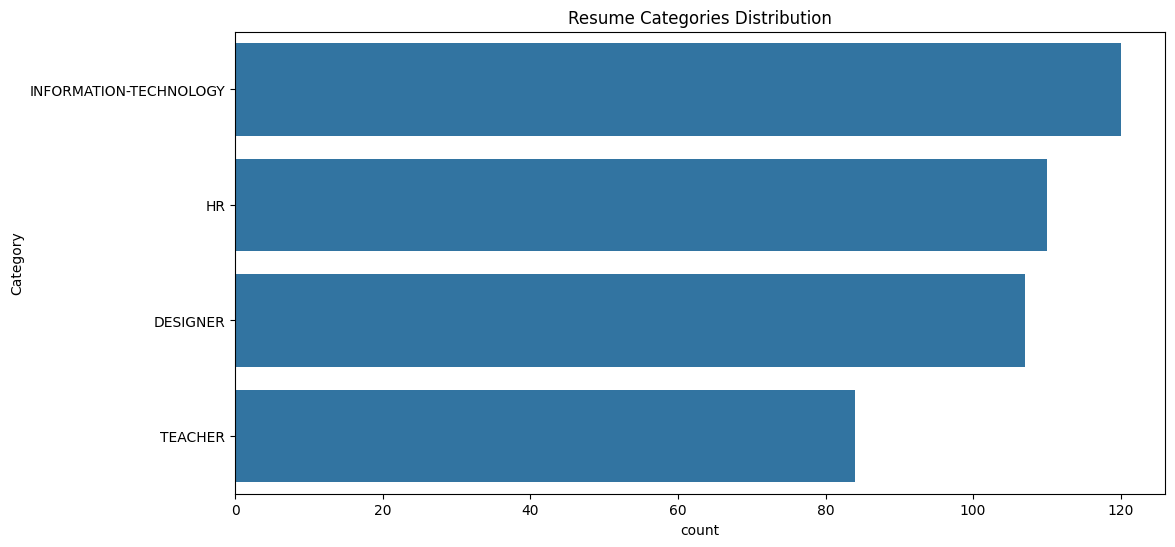

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title("Resume Categories Distribution")
plt.show()


# **Feature Extraction using TF-IDF**

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['Cleaned_Resume']).toarray()
y = df['Category']


# Train-Test **Split**

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Model Training**

**Model 1: Multinomial Naive Bayes**

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                         precision    recall  f1-score   support

              DESIGNER       0.92      0.69      0.79        16
                    HR       0.97      1.00      0.98        30
INFORMATION-TECHNOLOGY       0.83      1.00      0.90        19
               TEACHER       0.95      0.90      0.92        20

              accuracy                           0.92        85
             macro avg       0.91      0.90      0.90        85
          weighted avg       0.92      0.92      0.91        85



**Model 2: Logistic Regression Classifier**

In [43]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Results:
                        precision    recall  f1-score   support

              DESIGNER       0.86      0.75      0.80        16
                    HR       1.00      1.00      1.00        30
INFORMATION-TECHNOLOGY       0.86      1.00      0.93        19
               TEACHER       0.95      0.90      0.92        20

              accuracy                           0.93        85
             macro avg       0.92      0.91      0.91        85
          weighted avg       0.93      0.93      0.93        85



**Model 3: Random Forest Classifier**

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
                        precision    recall  f1-score   support

              DESIGNER       0.93      0.88      0.90        16
                    HR       1.00      1.00      1.00        30
INFORMATION-TECHNOLOGY       0.90      1.00      0.95        19
               TEACHER       1.00      0.95      0.97        20

              accuracy                           0.96        85
             macro avg       0.96      0.96      0.96        85
          weighted avg       0.97      0.96      0.96        85



# **Compare All Models in One Table**

In [45]:
from sklearn.metrics import accuracy_score

print("Model Accuracies:")
print("Naive Bayes:", accuracy_score(y_test, y_pred))
print("Logistic Regression:", accuracy_score(y_test, y_pred_log))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))


Model Accuracies:
Naive Bayes: 0.9176470588235294
Logistic Regression: 0.9294117647058824
Random Forest: 0.9647058823529412


# **Visualize Model Performance (Confusion Matrix)**

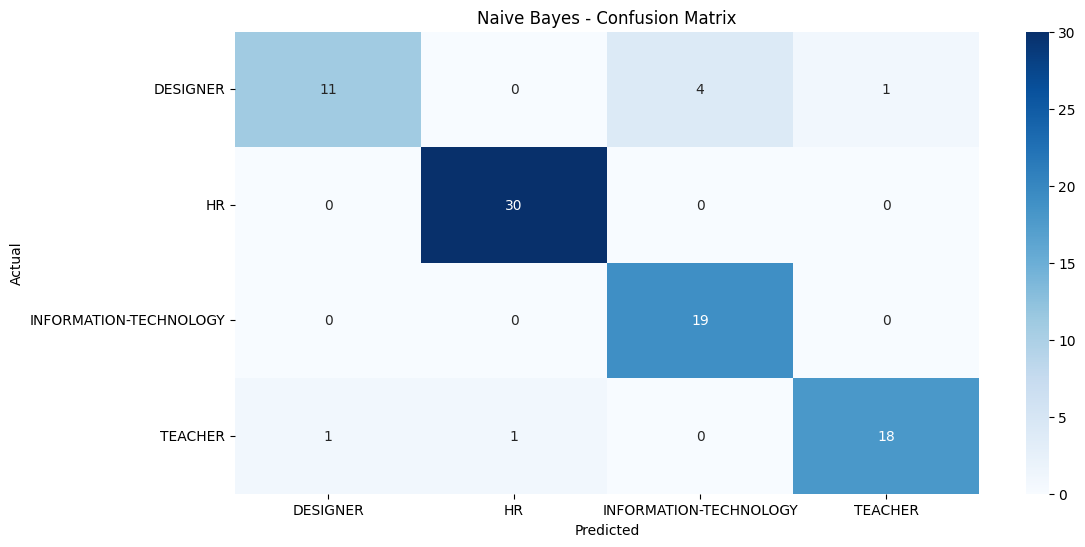

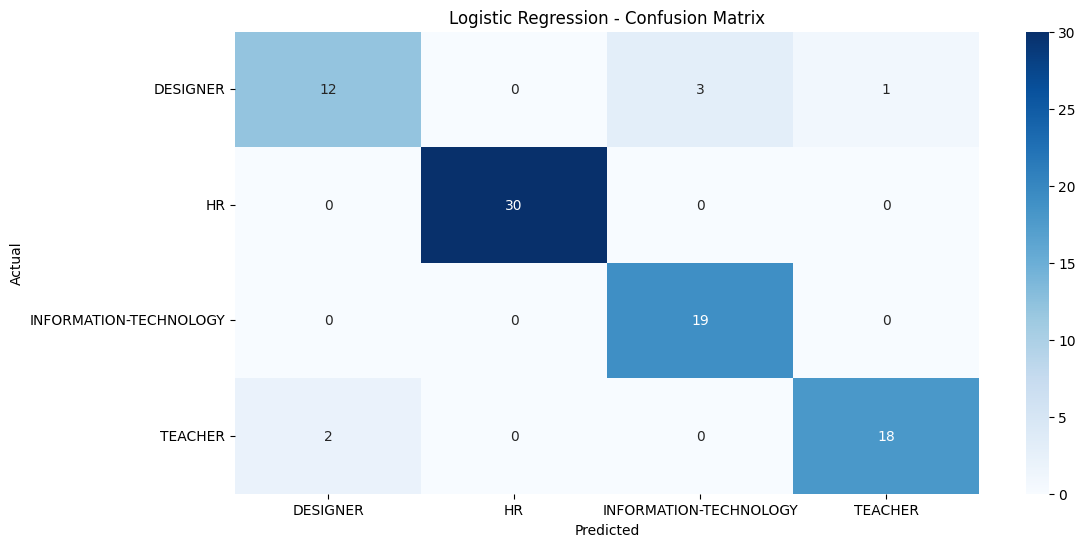

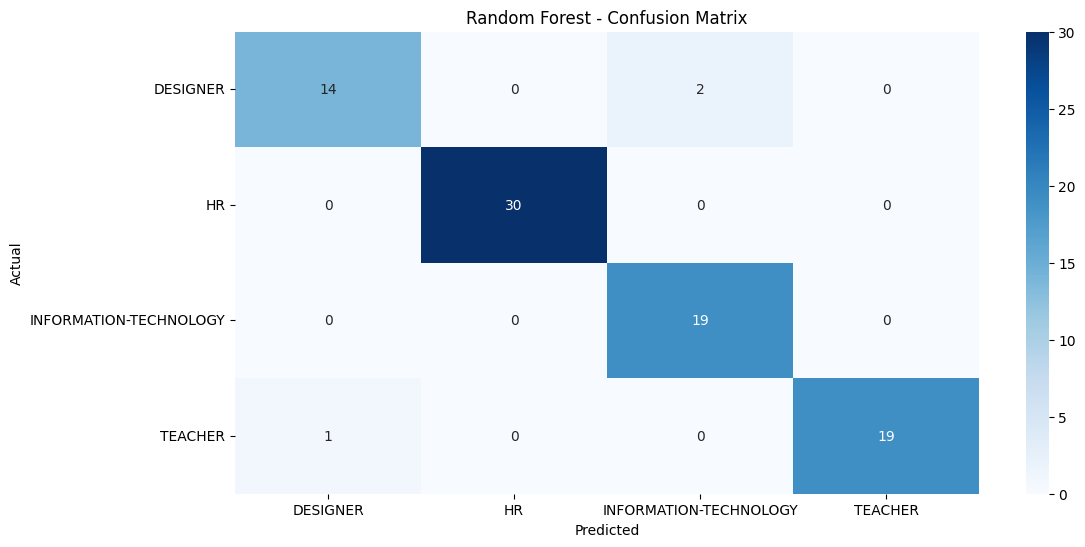

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred, "Naive Bayes")
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")


# **Accuracy Comparison Bar Chart**

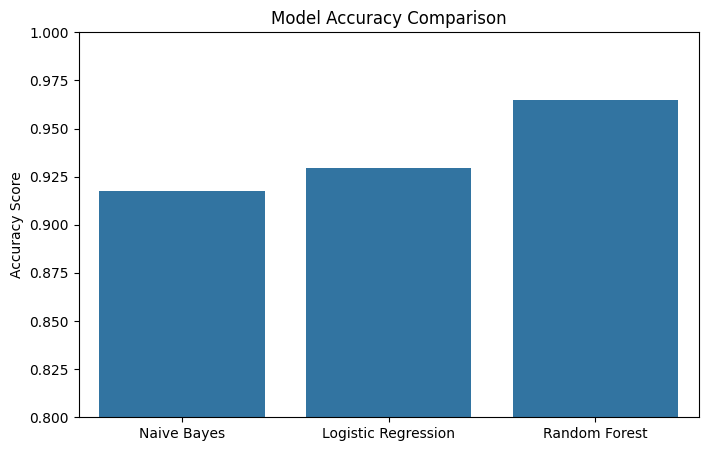

In [47]:
from sklearn.metrics import accuracy_score

# Get accuracy scores
acc_nb = accuracy_score(y_test, y_pred)
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Plot
plt.figure(figsize=(8,5))
models = ['Naive Bayes', 'Logistic Regression', 'Random Forest']
scores = [acc_nb, acc_log, acc_rf]
sns.barplot(x=models, y=scores)
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1.0)
plt.show()


# **Classification Report Heatmaps (Precision, Recall, F1)**

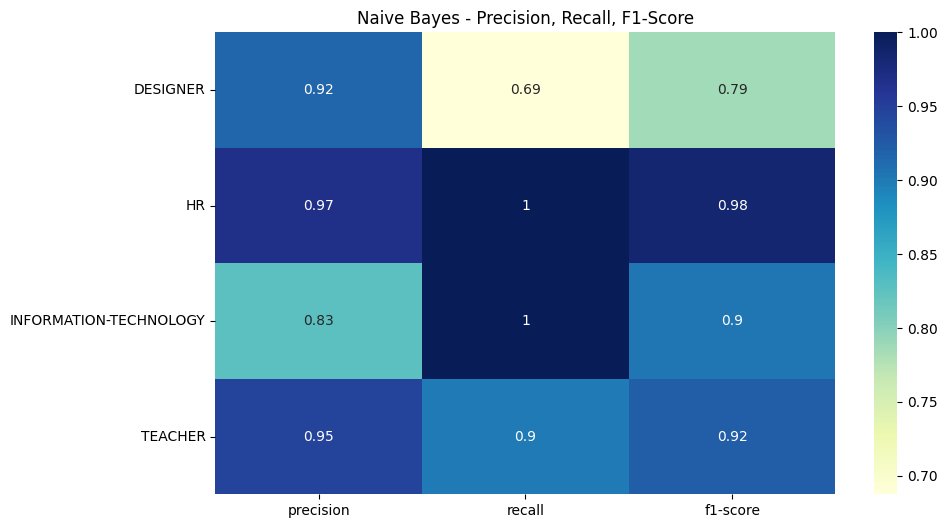

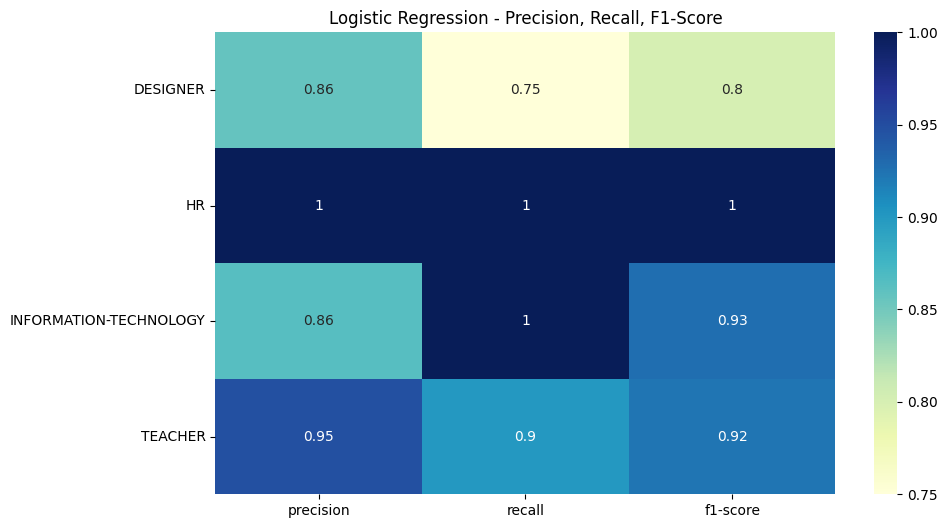

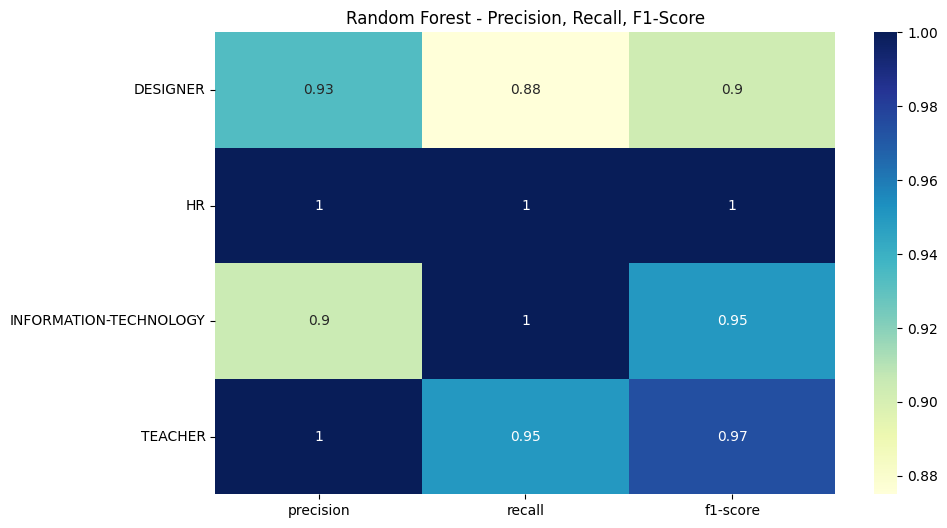

In [48]:
from sklearn.metrics import classification_report
import pandas as pd

def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])
    plt.figure(figsize=(10,6))
    sns.heatmap(df_report.iloc[:, :-1], annot=True, cmap="YlGnBu")  # exclude support
    plt.title(f"{model_name} - Precision, Recall, F1-Score")
    plt.show()

plot_classification_report(y_test, y_pred, "Naive Bayes")
plot_classification_report(y_test, y_pred_log, "Logistic Regression")
plot_classification_report(y_test, y_pred_rf, "Random Forest")


# **Most Important Words per Category (TF-IDF)**

In [49]:
import numpy as np

def top_words_per_category(classifier, vectorizer, categories, n=10):
    for i, category in enumerate(categories):
        print(f"\nTop {n} words for class: {category}")
        class_coeff = classifier.coef_[i]
        top_n = np.argsort(class_coeff)[-n:]
        for idx in reversed(top_n):
            print(f"{vectorizer.get_feature_names_out()[idx]} ({class_coeff[idx]:.4f})")

# Only works for logistic regression
top_words_per_category(log_reg, tfidf, log_reg.classes_, n=10)



Top 10 words for class: DESIGNER
designer (2.2501)
design (1.9513)
graphic (1.2739)
floral (0.7814)
interior (0.7647)
drawings (0.6520)
adobe (0.6358)
cad (0.5575)
designs (0.5269)
designing (0.4886)

Top 10 words for class: HR
hr (2.8190)
employee (1.6353)
human (1.3523)
payroll (1.0763)
employees (1.0039)
recruitment (0.8530)
resources (0.7883)
benefits (0.7833)
recruiting (0.6721)
management (0.6600)

Top 10 words for class: INFORMATION-TECHNOLOGY
technology (1.8338)
network (1.5048)
information (1.3415)
systems (1.0986)
hardware (0.9311)
software (0.9029)
support (0.8855)
security (0.8814)
windows (0.7454)
server (0.7350)

Top 10 words for class: TEACHER
teacher (2.2218)
students (1.4918)
children (1.1766)
student (0.8605)
learning (0.8358)
classroom (0.8039)
teaching (0.7753)
school (0.7530)
lesson (0.7312)
parents (0.6771)


# **Resume Category Prediction Function**

In [50]:
def predict_resume_category(text, model_to_use=log_reg):
    """
    Predict the job category of a given resume text.

    Parameters:
    text (str): The resume content
    model_to_use: Trained ML model (default = Logistic Regression)

    Returns:
    str: Predicted job category
    """
    # Step 1: Clean the resume text
    cleaned_text = clean_resume(text)

    # Step 2: Transform with trained TF-IDF vectorizer
    vectorized_input = tfidf.transform([cleaned_text])

    # Step 3: Predict using the selected model
    predicted_category = model_to_use.predict(vectorized_input)[0]

    return predicted_category


In [51]:
sample_resume = df['Resume_str'].iloc[0]  # Or paste your own resume string
category = predict_resume_category(sample_resume)
print("Predicted Job Category:", category)


Predicted Job Category: HR
